In [1]:
import traceback
import os
import json
from cpitospin import analyze_cpi_structure, CPIToSPINConverter

# Choose the test
All the test available are in folder 'CPIs'

In [2]:
process_name = "choice-task-init-reverse"

## Load File 

In [3]:
cpi_file_path = f'../CPIs/{process_name}.cpi'

print(f"Loading CPI file: {cpi_file_path}")

try:
	with open(cpi_file_path, 'r') as f:
		cpi_dict = json.load(f)

	print("✓ CPI file loaded successfully!")
	print(f"Root region type: {cpi_dict['type']}")
	print(f"Root region ID: {cpi_dict['id']}")

	# Pretty print the CPI structure
	print("\nCPI Structure:")
	print("=" * 50)
	print(json.dumps(cpi_dict, indent=2))

except FileNotFoundError:
	print(f"❌ File not found: {cpi_file_path}")
	print("Available files in CPIs directory:")
	try:
		for f in os.listdir('../CPIs'):
			if f.endswith('.cpi'):
				print(f"  - {f}")
	except:
		print("  Could not list CPIs directory")
except Exception as e:
	print(f"❌ Error loading CPI file: {e}")
	traceback.print_exc()

Loading CPI file: ../CPIs/choice-task-init-reverse.cpi
✓ CPI file loaded successfully!
Root region type: sequence
Root region ID: 1

CPI Structure:
{
  "type": "sequence",
  "id": 1,
  "head": {
    "type": "choice",
    "id": 3,
    "true": {
      "type": "task",
      "id": 4,
      "duration": 2,
      "impacts": {
        "impact_1": 0.3,
        "impact_2": 0.4
      }
    },
    "false": {
      "type": "task",
      "id": 5,
      "duration": 3,
      "impacts": {
        "impact_1": 0.5,
        "impact_2": 0.5
      }
    }
  },
  "tail": {
    "type": "task",
    "id": 2,
    "duration": 3,
    "impacts": {
      "impact_1": 0.4,
      "impact_2": 0.5
    }
  }
}


# FROM CPI TO SPIN

In [4]:
print("\nCPI Structure Analysis:")
print("=" * 50)
if 'cpi_dict' in locals():
	analyze_cpi_structure(cpi_dict)

print("Converting CPI to SPIN...")
print("=" * 50)

try:
	converter = CPIToSPINConverter()
	spin_model = converter.convert_cpi_to_spin(cpi_dict)

	print("✓ Conversion successful!")
	print("\nSPIN Model Summary:")
	print("-" * 30)
	spin_model.print_model_summary()

except Exception as e:
	print(f"❌ Conversion failed: {e}")
	traceback.print_exc()


CPI Structure Analysis:
sequence1
  head:
    choice3
      true:
        task4
          duration: 2
          impacts: {'impact_1': 0.3, 'impact_2': 0.4}
      false:
        task5
          duration: 3
          impacts: {'impact_1': 0.5, 'impact_2': 0.5}
  tail:
    task2
      duration: 3
      impacts: {'impact_1': 0.4, 'impact_2': 0.5}
Converting CPI to SPIN...
✓ Conversion successful!

SPIN Model Summary:
------------------------------
=== SPIN to PRISM Translation ===
Places: 5
  choice3_false4: duration=3
  choice3_true3: duration=2
  end1: duration=0
  seq1_mid2: duration=3
  start0: duration=0 (INITIAL)

Transitions: 4
  choice30 (choice): ['start0'] -> ['choice3_true3', 'choice3_false4']
  task23 (task): ['seq1_mid2'] -> ['end1']
    Impact: [0.4, 0.5]
  task41 (task): ['choice3_true3'] -> ['seq1_mid2']
    Impact: [0.3, 0.4]
  task52 (task): ['choice3_false4'] -> ['seq1_mid2']
    Impact: [0.5, 0.5]



Creating visualizations...
✓ CPI visualization created
✓ SPIN visualization created

CPI Structure Visualization:


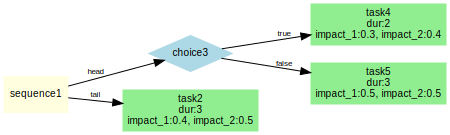


SPIN Model Visualization:


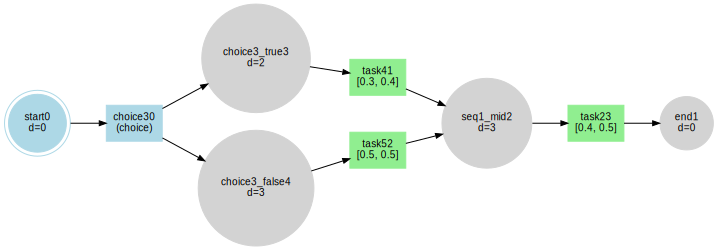

In [5]:
from cpitospin import create_cpi_visualization, create_spin_visualization

print("\nCreating visualizations...")
print("=" * 50)

try:
	# Create CPI visualization
	cpi_viz = create_cpi_visualization(cpi_dict, "CPI: Loop Example")
	print("✓ CPI visualization created")

	# Create SPIN visualization
	spin_viz = create_spin_visualization(spin_model, "SPIN: Loop Example")
	print("✓ SPIN visualization created")

	# Display visualizations (if in Jupyter)
	try:
		print("\nCPI Structure Visualization:")
		display(cpi_viz)

		print("\nSPIN Model Visualization:")
		display(spin_viz)
	except NameError:
		# Not in Jupyter, save to files instead
		print("Saving visualizations to files...")

		# Save CPI visualization
		cpi_output = process_name + '_cpi'
		cpi_viz.render(cpi_output, cleanup=True)
		print(f"CPI visualization saved to: {cpi_output}.png")

		# Save SPIN visualization
		spin_output = process_name + '_spin'
		spin_viz.render(spin_output, cleanup=True)
		print(f"SPIN visualization saved to: {spin_output}.png")

except Exception as e:
	print(f"❌ Visualization failed: {e}")
	traceback.print_exc()


# FROM SPIN TO PRISM

In [6]:
print("\nGenerating PRISM model...")
print("=" * 50)

try:
	prism_model = spin_model.generate_prism_model()

	print("✓ PRISM model generated successfully!")

	# Show model statistics
	lines = prism_model.split('\n')
	words = prism_model.split()

	print(f"Model statistics:")
	print(f"  Lines: {len(lines)}")
	print(f"  Words: {len(words)}")
	print(f"  Characters: {len(prism_model)}")

	# Show first 20 lines
	print(f"\nFirst 20 lines of PRISM model:")
	print("-" * 40)
	for i, line in enumerate(lines[:20]):
		print(f"{i + 1:2d}: {line}")

	if len(lines) > 20:
		print(f"... ({len(lines) - 20} more lines)")

except Exception as e:
	print(f"❌ PRISM generation failed: {e}")
	traceback.print_exc()

print("\nSaving PRISM model...")
print("=" * 50)

try:
	output_file =  "../models/" + process_name + '.nm'
	with open(output_file, 'w') as f:
		f.write(prism_model)

	print(f"✓ PRISM model saved to: {output_file}")

	# Verify file was created
	if os.path.exists(output_file):
		file_size = os.path.getsize(output_file)
		print(f"File size: {file_size} bytes")
	else:
		print("❌ Warning: File was not created")

except Exception as e:
	print(f"❌ Save failed: {e}")
	traceback.print_exc()


Generating PRISM model...
✓ PRISM model generated successfully!
Model statistics:
  Lines: 215
  Words: 1208
  Characters: 12652

First 20 lines of PRISM model:
----------------------------------------
 1: // Global variables for places
 2: global STAGE : [0..5] init 0;
 3: 
 4: // Place value variables
 5: global choice3_false4_value : [-1..3] init -1;
 6: global choice3_true3_value : [-1..2] init -1;
 7: global end1_value : [-1..0] init -1;
 8: global seq1_mid2_value : [-1..3] init -1;
 9: global start0_value : [-1..0] init 0;
10: 
11: // Place updated variables
12: global choice3_false4_updated : [0..1] init 0;
13: global choice3_true3_updated : [0..1] init 0;
14: global end1_updated : [0..1] init 0;
15: global seq1_mid2_updated : [0..1] init 0;
16: global start0_updated : [0..1] init 0;
17: 
18: // Formulas
19: formula is_active_choice30 = (start0_value >= 0);
20: formula is_active_task23 = (seq1_mid2_value >= 3);
... (195 more lines)

Saving PRISM model...
✓ PRISM model saved to:

## RUN PRISM ANALYSIS

In [7]:
!prism

PRISM
=====

Version: 4.8.1
Date: Tue Jun 10 15:25:42 UTC 2025
Hostname: c444078b476d
Memory limits: cudd=1g, java(heap)=1g
Command line: prism
Usage: prism [options] <model-file> [<properties-file>] [more-options]

For more information, type: prism -help


In [8]:
from run_prism import run_prism_analysis
run_prism_analysis(process_name)

Running PRISM command: prism /app/models/choice-task-init-reverse.nm -exporttransdotstates /app/results/choice-task-init-reverse/choice-task-init-reverse.dot -exportstates /app/results/choice-task-init-reverse/choice-task-init-reverse_states.csv -exporttrans /app/results/choice-task-init-reverse/choice-task-init-reverse_trans.tra -verbose
Analysis complete. Results saved to ../results/choice-task-init-reverse/choice-task-init-reverse.info


{'timestamp': '2025-06-10T15:25:44.025837',
 'modules': ['manager', 'choice30', 'task23', 'task41', 'task52'],
 'variables': ['STAGE',
  'choice3_false4_value',
  'choice3_true3_value',
  'end1_value',
  'seq1_mid2_value',
  'start0_value',
  'choice3_false4_updated',
  'choice3_true3_updated',
  'end1_updated',
  'seq1_mid2_updated',
  'start0_updated',
  'choice30_state',
  'task23_state',
  'task41_state',
  'task52_state'],
 'task_impacts': {'task4': {'impact_1': 0.3, 'impact_2': 0.4},
  'task5': {'impact_1': 0.5, 'impact_2': 0.5},
  'task2': {'impact_1': 0.4, 'impact_2': 0.5}},
 'model_build_time': 0.05,
 'command': 'prism /app/models/choice-task-init-reverse.nm -exporttransdotstates /app/results/choice-task-init-reverse/choice-task-init-reverse.dot -exportstates /app/results/choice-task-init-reverse/choice-task-init-reverse_states.csv -exporttrans /app/results/choice-task-init-reverse/choice-task-init-reverse_trans.tra -verbose',
 'prism_output': 'PRISM\n=====\n\nVersion: 4.8.1\n

In [9]:
from graphviz import Source
with open(f"../results/{process_name}/{process_name}.dot", 'r', encoding='utf-8') as f: 
    dot_content = f.read() 
    graph = Source(dot_content) # Esporta in SVG graph.render(filename=output_path, format='svg', cleanup=True)
    graph.render(filename=f"../results/{process_name}/{process_name}", format='svg', cleanup=True)

# FROM PRISM TO MDP

Since PRISM models are based on an extended form of MDPs, we now provide the compact version of the MDP generated by PRISM, which corresponds to the equivalent SPIN model. This enhances clarity and facilitates easier comparison between the two representations.

    choice3_false4_value  choice3_true3_value  end1_value  seq1_mid2_value  \
0                     -1                   -1          -1               -1   
5                     -1                   -1          -1                0   
6                     -1                   -1          -1                1   
7                     -1                   -1          -1                2   
12                    -1                   -1          -1                3   
17                    -1                   -1           0               -1   
18                    -1                    0          -1               -1   
19                    -1                    1          -1               -1   
24                    -1                    2          -1               -1   
25                     0                   -1          -1               -1   
26                     1                   -1          -1               -1   
27                     2                   -1          -1       

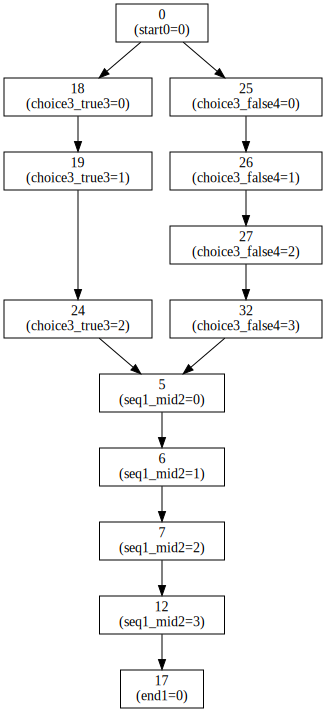

In [38]:
from graphviz import Source
import pandas as pd
import re
import networkx as nx
def create_states_mdp(process_name: str = 'test'):
    # Load DOT content
    with open(f"../results/choice-task-init-reverse/dot", 'r', encoding='utf-8') as f: #{process_name}/{process_name}.dot
        dot_content = f.read()

    # Load and clean the DataFrame
    df =  pd.read_csv(f"../results/choice-task-init-reverse/states.txt")#pd.read_csv(f"../results/{process_name}/{process_name}_states.csv")
    df['STAGE'] = df['(STAGE'].apply(lambda x: x.split(':')[-1].split('(')[-1] if isinstance(x, str) else x)
    df.drop(columns=['(STAGE'], inplace=True)

    paren_cols = [col for col in df.columns if col.endswith(')')]
    for col in paren_cols:
        df[col.replace(')', '')] = df[col].apply(lambda x: x[-2] if isinstance(x, str) and len(x) >= 2 else x)
        df.drop(columns=[col], inplace=True)

    df = df.apply(pd.to_numeric)

    # Select relevant columns
    update_cols = [col for col in df.columns if col.endswith('_update')]
    state_cols = [col for col in df.columns if col.endswith('_state')]
    value_cols = [col for col in df.columns if col.endswith('_value')]

    # Identify new states
    stage_mask = df['STAGE'].isin([0])
    update_mask = (df[update_cols] == 0).all(axis=1)
    state_mask = (df[state_cols] == 0).all(axis=1)
    new_states_df = df[stage_mask & update_mask & state_mask]
    print(new_states_df)
    print('len >>>>>', len(new_states_df))
    new_state_ids = new_states_df.index.astype(str).tolist()

    edge_pattern = re.compile(r'(\d+)\s*->\s*(\d+)')
    edges = edge_pattern.findall(dot_content)
    G = nx.DiGraph()
    G.add_edges_from(edges)

    # Compress: connect new state nodes if there's a path between them (and no other new node in between)
    compressed_edges = []
    for src in new_state_ids:
        for tgt in new_state_ids:
            if src != tgt and nx.has_path(G, src, tgt):
                # Check if any *intermediate* node on the path is also a new state
                path = nx.shortest_path(G, src, tgt)
                intermediates = set(path[1:-1])
                if not set(intermediates) & set(new_state_ids):
                    compressed_edges.append((src, tgt))

    # Build new DOT
    lines = ['digraph LTS {', 'node [label="", shape="box"];']

    # Format node labels
    def format_label(row):
        parts = [
            f"{col.replace('_value', '')}={int(row[col])}"
            for col in value_cols if row[col] >= 0
        ]
        return f'{row.name} [label="{row.name}\\n(' + ", ".join(parts) + ')"];'

    for idx, row in new_states_df.iterrows():
        lines.append(format_label(row))

    # Add compressed edges
    for src, tgt in compressed_edges:
        lines.append(f'{src} -> {tgt};')

    lines.append('}')
    compressed_dot = "\n".join(lines)
    return Source(compressed_dot)

create_states_mdp(process_name )# = 'parallel'

In [16]:
pd.read_csv(f"../results/{process_name}/{process_name}_states.csv")

,(STAGE,choice3_false4_value,choice3_true3_value,end1_value,seq1_mid2_value,start0_value,choice3_false4_updated,choice3_true3_updated,end1_updated,seq1_mid2_updated,start0_updated,choice30_state,task23_state,task41_state,task52_state)
0,0:(0,-1,-1,-1,-1,0,0,0,0,0,0,0,0,0,0)
1,1:(0,-1,-1,-1,-1,0,0,0,0,0,0,1,-1,-1,-1)
2,2:(0,-1,-1,-1,-1,0,0,0,0,0,0,1,-1,-1,0)
3,3:(0,-1,-1,-1,-1,0,0,0,0,0,0,1,-1,0,0)
4,4:(0,-1,-1,-1,-1,0,0,0,0,0,0,1,0,0,0)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,148:(4,0,-1,-1,-1,-1,0,0,0,0,0,0,0,0,0)
149,149:(4,3,-1,-1,-1,-1,0,0,0,0,0,-1,-1,-1,1)
150,150:(4,3,-1,-1,-1,-1,0,0,0,0,0,0,-1,-1,1)
151,151:(4,3,-1,-1,-1,-1,0,0,0,0,0,0,0,-1,1)


In [18]:
pd.read_csv(f"../results/{process_name}/{process_name}_trans.tra")

,153 154
0,0 0 4
1,1 0 130
2,2 0 1
3,3 0 2
4,4 0 3
...,...
149,148 0 25
150,149 0 150
151,150 0 151
152,151 0 152
